## Raport zaliczeniowy

#### 1. Importowanie bibliotek

In [59]:
import pandas as pd
import pingouin as pg
import numpy as np

import os, os.path as op
from glob import glob

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#### 2. Wczytywanie i wyświetlanie bazy danych

In [6]:
d = pd.read_csv(glob(op.join("data","student-m*.csv"))[0])

In [7]:
d

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


#### 3. Opis badania 

Robimy badanie na temat różnych związków w bazie danych. Baza pokazuje konsumpcję alcoholu wśród uczniów kursu matematyki dwóch portugalskich szkół średnich. W tej bazie mamy liczne kolumny z danymi na temat danych osobowych uczniów, ich relacji w rodzinach i życia osobistego. 
Chcemy sprawdzić następujące aspekty:\
    1. Czy uczniowie szkół GP i MS różnią się liczbą przeszłych niepowodzeń akademicznych? (metodą testu t-Studenta dla prób niezależnych)\
    2. Która z ocen jest wyższa - w pierwszym czy drugim periodzie? (metodą testu t-Studenta dla prób zależnych)\
    3. Czy poziom edukacji matki ucznia wpływa na finalną ocenę? (jednoczynnikowa analiza wariancji - anova w schemacie międzygrupowym)\
    4. Czy ilość osób w rodzinie ucznia oraz typ miejsca zamieszkania wpływają na finalną ocenę? (dwuczynnikowa analiza wariancji - analiza w schemacie międzygrupowym)\
    5. Czy nieobecność w szkole jest powiązana z wiekiem? (analiza korelacji r Pearsona)\
    6. Czy można przewidywać finalną ocenę na podstawie płci, liczby nieobecności w szkole oraz wieku? (analiza regresji liniowej)

#### 4. Procesy badan, analizy statystyczne, wnioski i wizualizacje danych

##### 4.1 Czy uczniowie szkół GP i MS różnią się liczbą przeszłych niepowodzeń akademicznych? 

In [8]:
d.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [9]:
d['school'].unique()

array(['GP', 'MS'], dtype=object)

In [10]:
d['failures'].unique()

array([0, 3, 2, 1], dtype=int64)

H0: Uczniowie dwóch szkół nie różnią się liczbą niepowodzeń.\
H1: Uczniowie dwóch szkół różnią się liczbą niepowodzeń.

In [11]:
pg.ttest(d[d['school'] == 'GP']['failures'], d[d['school'] == 'MS']['failures'])

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.103194,55.236504,two-sided,0.274726,"[-0.39, 0.11]",0.1863,0.297,0.219952


In [12]:
d.groupby(['school']).agg(M=('failures',np.mean),SD=('failures',np.std)).round(2)

,M,SD
school,,
GP,0.32,0.73
MS,0.46,0.81


##### Wnioski

W celu sprawdzenia czy uczniowie dwóch szkół różnią się liczbą przeszłych niepowodzeń akademicznych, wykonano analizę testem t Studenta dla prób niezależnych. Wynik tej analizy okazał się nieistotny statystycznie, t(55) = -1.1 ; p = 0.27 ; d = 0.18. Nie wykazano istotnych statystycznie różnic między uczniami szkoły GP (M = 0.32; SD = 0.73) a uczniami szkoły MS (M = 0.46; SD = 0.81). Hipoteza badawcza (alternatywna) nie potwierdziła się.

##### Wizualizacja wyników

[Text(0, 0, 'GP'), Text(1, 0, 'MS')]

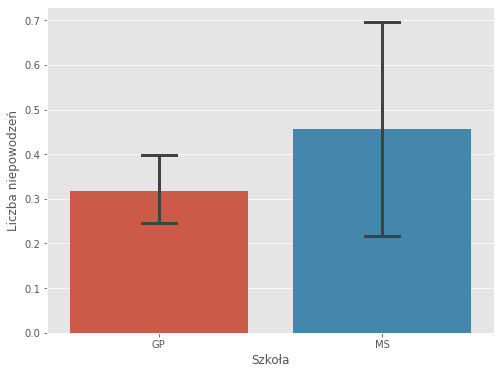

In [71]:
plt.style.use("ggplot")

fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(x='school',y='failures',data=d,
            order=['GP','MS'],capsize=.15,errwidth=3)

ax.set_xlabel("Szkoła")
ax.set_ylabel("Liczba niepowodzeń")

ax.set_xticklabels(["GP","MS"])


##### 4.2 Która z ocen jest wyższa - w pierwszym czy drugim periodzie?

In [13]:
d.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


H0: Period nie wpływa na ocenę uczniów.\
HA: Period wpływa na ocenę uczniów.

In [14]:
pg.ttest(d['G1'],d['G2'],paired=True).round(4)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.9648,394,two-sided,0.0501,"[-0.0, 0.39]",0.055,0.38,0.1932


In [15]:
d[['G1','G2']].agg([np.mean,np.std]).round(2)

,G1,G2
mean,10.91,10.71
std,3.32,3.76


##### Wnioski

W celu sprawdzenia czy period wpływa na ocenę uczniów wykonano analizę przy użyciu testu t dla prób zależnych. Wynik analizy okazał się istotny statystycznie, t(394) = 1.96 ; p = 0.05 ; d = 0.05. Wynik d Cohena wskazuje na występowanie słabego efektu periodu. Oceny w pierwszym periodzie (M = 10.91; SD = 3.32) są wyższe od ocen w drugim periodzie (M = 10.71; SD = 3.76).

##### Wizualizacja wyników

Dlatego, żeby poprawnie wizualizować dane, należy stworzyć nową bazę.

In [65]:
f = pd.melt(d, value_vars=['G1','G2'],var_name = "period", value_name = "pkt")

In [66]:
f 

,period,pkt
0,G1,5
1,G1,5
2,G1,7
3,G1,15
4,G1,6
...,...,...
785,G2,9
786,G2,16
787,G2,8
788,G2,12


In [55]:
f['pkt'].max()

19

(0.0, 20.0)

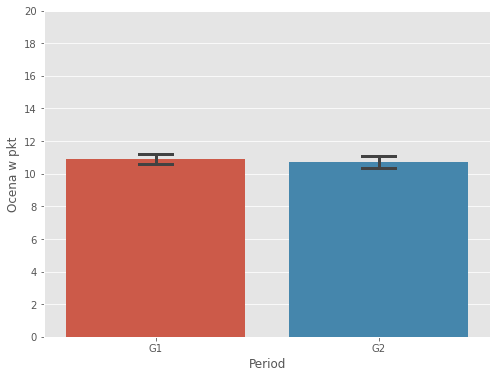

In [60]:
plt.style.use("ggplot")

fig, ax = plt.subplots(figsize=(8, 6))

sns.barplot(x='period', y='pkt',data=f,
           capsize=.15,errwidth=3)

ax.set_xlabel("Period")
ax.set_ylabel("Ocena w pkt")


for axis in [ax.xaxis, ax.yaxis]:
    axis.set_major_locator(ticker.MaxNLocator(integer=True))
    
ax.set_ylim(0,20)

##### 4.3. Czy poziom edukacji matki ucznia wpływa na finalną ocenę? 

H0: Poziom edukacji matki ucznia nie wpływa na  finalną ocenę.\
H1: Poziom edukacji matki uczniawpływa na  finalną ocenę.

In [16]:
d

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [17]:
d['Medu'].unique()

array([4, 1, 3, 2, 0], dtype=int64)

In [18]:
edukacja = {1:"4 klasy",2:"9 klasy",3:"średnie", 4: "wyższe"}

In [19]:
d['Medu'] = d['Medu'].map(edukacja)

In [20]:
d['Fedu'] = d['Fedu'].map(edukacja)

In [21]:
d

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,wyższe,wyższe,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,4 klasy,4 klasy,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,4 klasy,4 klasy,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,wyższe,9 klasy,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,średnie,średnie,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,9 klasy,9 klasy,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,średnie,4 klasy,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,4 klasy,4 klasy,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,średnie,9 klasy,services,other,...,4,4,1,3,4,5,0,11,12,10


In [22]:
d['G3'].max()

20

In [23]:
d['G3'].min()

0

In [24]:
d1 = d.filter(['Medu','G3'], axis=1)

In [25]:
d1

,Medu,G3
0,wyższe,6
1,4 klasy,6
2,4 klasy,10
3,wyższe,15
4,średnie,10
...,...,...
390,9 klasy,9
391,średnie,16
392,4 klasy,7
393,średnie,10


In [26]:
d1.groupby(['Medu']).agg([np.mean,np.std,np.min,np.max,np.size])

G3                         
              mean       std amin amax size
Medu                                       
4 klasy   8.677966  4.364594    0   16   59
9 klasy   9.728155  4.636163    0   19  103
wyższe   11.763359  4.267646    0   20  131
średnie  10.303030  4.623486    0   19   99

In [27]:
pg.anova(data=d1, dv='G3',between='Medu').round(4)

,Source,ddof1,ddof2,F,p-unc,np2
0,Medu,3,388,7.7646,0.0,0.0566


F(3, 388) = 7.76 ; p < 0.001 ; etap2 = 0.056

In [28]:
pg.pairwise_ttests(data=d1, dv='G3',between='Medu',effsize='cohen',padjust='sidak').round(4)

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,cohen
0,Medu,4 klasy,9 klasy,False,True,-1.4404,127.0278,two-sided,0.1522,0.6287,sidak,0.455,-0.2313
1,Medu,4 klasy,wyższe,False,True,-4.5398,109.6339,two-sided,0.0000,0.0001,sidak,1670.079,-0.7179
2,Medu,4 klasy,średnie,False,True,-2.2139,127.7115,two-sided,0.0286,0.1598,sidak,1.645,-0.3588
3,Medu,9 klasy,wyższe,False,True,-3.4514,210.0373,two-sided,0.0007,0.0040,sidak,35.974,-0.4591
4,Medu,9 klasy,średnie,False,True,-0.8822,199.7255,two-sided,0.3787,0.9425,sidak,0.221,-0.1242
5,Medu,wyższe,średnie,False,True,2.4511,201.7696,two-sided,0.0151,0.0872,sidak,2.409,0.3301


In [29]:
d1.groupby(['Medu']).agg([np.mean,np.std]).round(2)

G3      
          mean   std
Medu                
4 klasy   8.68  4.36
9 klasy   9.73  4.64
wyższe   11.76  4.27
średnie  10.30  4.62

##### Wnioski

W celu sprawdzenia czy poziom edukacji matki ucznia wpływa na finalną ocenę, wykonano jednoczynnikową analizę wariancji w schemacie międzygrupowym. Wynik tej analizy okazał się istotny statystycznie, F(3, 388) = 7.76 ; p < 0.001 ; etap2 = 0.056. Wynik etap2 wskazuje na występowanie średniego efektu poziomu edukacji matki. Porównania parami z korektą Sidaka wykazały istnienie istotnych statystycznie różnic między:

- uczniami, których matki skończyły 4 klasy a uczniami, których matki mają wykształcenie wyższe (p < 0.001),
- uczniami, których matki skończyły 9 klasy a uczniami, których matki mają wykstałcenie wyższe (p < 0.001).

Nie wykazano istotnych statystycznie różnic między:
- uczniami, których matki skończyły 4 klasy a uczniami, których matki skończyły 9 klasy  (p = 0.62),
- uczniami, których matki skończyły 4 klasy a uczniami, których matki mają wykształcenie średnie (p = 0.15),
- uczniami, których matki skończyły 9 klasy a uczniami, których matki mają wykształcenie średnie (p = 0.94),
- uczniami, których matki mają wykształcenie wyższe a uczniami, których matki mają wykształcenie średnie (p = 0.08)

Uczniowie, których matki mają wykształcenie wyższe (M = 11.76 ; SD = 4.27) uzyskują wyższe finalne wyniki jak od uczniów, których matki skończyły 4 klasy (M = 8.68; SD = 4.36), tak i od uczniów, których matki skończyły 9 klasy (M = 9.73; SD = 4.64).

##### Wizualizacja wyników

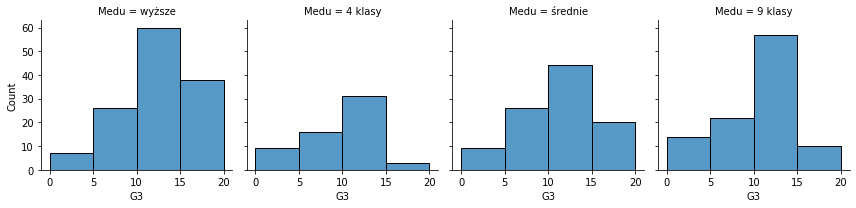

In [30]:
g = sns.FacetGrid(data=d1, col='Medu')
g.map_dataframe(sns.histplot, x="G3", binwidth=5)

(0.0, 20.0)

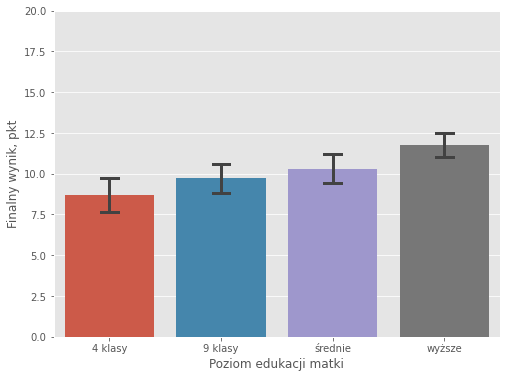

In [31]:
plt.style.use("ggplot")

fig, ax = plt.subplots(figsize=(8, 6))


sns.barplot(x='Medu',y='G3',data=d,
            order=["4 klasy","9 klasy","średnie", "wyższe"],capsize=.15,errwidth=3)

ax.set_xlabel("Poziom edukacji matki")
ax.set_ylabel("Finalny wynik, pkt")

ax.set_ylim(0,20)

##### 4.4. Czy ilość osób w rodzinie ucznia oraz typ miejsca zamieszkania wpływają na finalną ocenę?

H0: Ilość osób w rodzinie ucznia oraz typ miejsca zamieszkania nie wpływają na finalną ocenę\
H1: Ilość osób w rodzinie ucznia oraz typ miejsca zamieszkania wpływają na finalną ocenę

In [32]:
adres = {'U' : 'miasto', 'R':'wieś'}

In [33]:
d['address'] = d['address'].map(adres)

In [34]:
d

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,miasto,GT3,A,wyższe,wyższe,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,miasto,GT3,T,4 klasy,4 klasy,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,miasto,LE3,T,4 klasy,4 klasy,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,miasto,GT3,T,wyższe,9 klasy,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,miasto,GT3,T,średnie,średnie,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,miasto,LE3,A,9 klasy,9 klasy,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,miasto,LE3,T,średnie,4 klasy,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,wieś,GT3,T,4 klasy,4 klasy,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,wieś,LE3,T,średnie,9 klasy,services,other,...,4,4,1,3,4,5,0,11,12,10


In [35]:
pg.anova(data = d, dv = 'G3', between = ['famsize','address']).round(4)

,Source,SS,DF,MS,F,p-unc,np2
0,famsize,45.2091,1.0,45.2091,2.1896,0.1397,0.0056
1,address,82.8970,1.0,82.8970,4.0150,0.0458,0.0102
2,famsize * address,59.2311,1.0,59.2311,2.8688,0.0911,0.0073
3,Residual,8072.9751,391.0,20.6470,NaN,NaN,NaN


In [36]:
d.groupby(['famsize'])['G3'].agg([np.mean,np.std]).round(2)

,mean,std
famsize,,
GT3,10.18,4.70
LE3,11.00,4.23


##### Wnioski

W celu sprawdzenia czy ilość ludzi w rodzinie ucznia oraz typ miejsca zamieszkania wpływają na finalną ocenę, wykonano dwuczynnikową analizę wariancji w schemacie międzygrupowym.

#### Efekt główny rodziny

Efekt główny rodziny (Czy uczniowie, którzy mają mniej niż 3 osoby w rodzinie i ci, którzy mają więcej niż 3 osoby w rodzinie różnią się wynikami? [niezależnie od typa miejsca zamieszkania]?)

F(1, 391) = 2.18 ; p = 0.14; np2 = 0.005.

Efekt główny ilości osób w rodzinie ucznia okazał się nieistotny statystycznie, F(1, 391) = 2.18 ; p = 0.14; np2 = 0.005. Nie wykazano istotnych statystycznie różnic między uczniami, którzy mają mniej niż 3 osoby w rodzinie (M = 11.00; 4.23) a uczniami, którzy mają więcej niż 3 osoby w rodzinie (M = 10.18; 4.70).

In [37]:
pg.anova(data = d, dv = 'G3', between = ['famsize','address']).round(4)

,Source,SS,DF,MS,F,p-unc,np2
0,famsize,45.2091,1.0,45.2091,2.1896,0.1397,0.0056
1,address,82.8970,1.0,82.8970,4.0150,0.0458,0.0102
2,famsize * address,59.2311,1.0,59.2311,2.8688,0.0911,0.0073
3,Residual,8072.9751,391.0,20.6470,NaN,NaN,NaN


In [38]:
d.groupby(['address'])['G3'].agg([np.mean,np.std]).round(2)

,mean,std
address,,
miasto,10.67,4.56
wieś,9.51,4.56


#### Efekt główny miejsca zamieszkania
Efekt główny miejsca zamieszkania (Czy uczniowie, którzy miwszkają w mieście a ci, którzy mieszkają na wsi różnią się wynikami? [niezależnie od ilości osób w rodzinie]?)

F(1, 391) = 4.02 ; p = 0.04; np2 = 0.01.

Efekt główny miejsca zamieszkania ucznia okazał się istotny statystycznie, F(1, 391) = 4.02 ; p = 0.04; np2 = 0.01. Wynik np2 wskazuje na występowanie śłabego efektu miejsca zamieszkania. Uczniowie, którzy mieszkają w mieście (M = 10.67; 4.56) mają wyższą finalną ocenę od uczniów, którzy mieszkają na wsi (M = 9.51; 4.56).

In [39]:
pg.anova(data = d, dv = 'G3', between = ['famsize','address']).round(4)

,Source,SS,DF,MS,F,p-unc,np2
0,famsize,45.2091,1.0,45.2091,2.1896,0.1397,0.0056
1,address,82.8970,1.0,82.8970,4.0150,0.0458,0.0102
2,famsize * address,59.2311,1.0,59.2311,2.8688,0.0911,0.0073
3,Residual,8072.9751,391.0,20.6470,NaN,NaN,NaN


#### Efekt interakcji rodziny i miejsca zamieszkania 

Efekt interakcji rodziny i miejsca zamieszkania (Czy ilość osób w rodzinie ucznia oraz typ miejsca zamieszkania wpływają na finalną ocenę?)


F(1, 391) = 2.87; p = 0.09 ; np2 = 0,007.

Efekt interakcji rodziny i miejsca zamieszkania okazał się nieistotny statystycznie, F(1, 391) = 2.87; p = 0.09 ; np2 = 0,007. Nie wykazano istotnych statystycznie różnic między uczniami, którzy mają mniej niż 3 osoby w rodzinie (M = 11.00; 4.23) a uczniami, którzy mają więcej niż 3 osoby w rodzinie (M = 10.18; 4.70) oraz między uczniami którzy mieszkają w mieście (M = 10.67; 4.56) a uczniami, którzy mieszkają na wsi (M = 9.51; 4.56).

Hipoteza badawcza nie potwierdziła się i ilość osób w rodzinie ucznia oraz typ miejsca zamieszkania nie wpływają na finalną ocenę.

##### Wizualizacja wyników

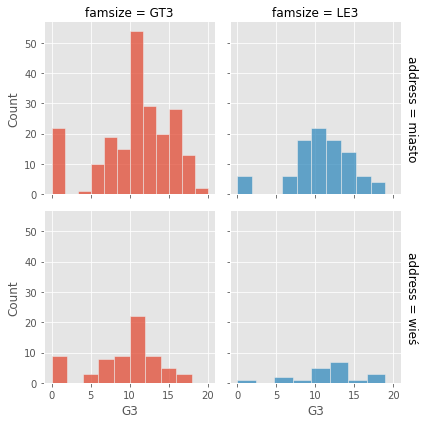

In [40]:
g = sns.FacetGrid(d, col = 'famsize', row = 'address', hue = 'famsize', margin_titles = True)
g.map_dataframe(sns.histplot,x='G3')

(0.0, 20.0)

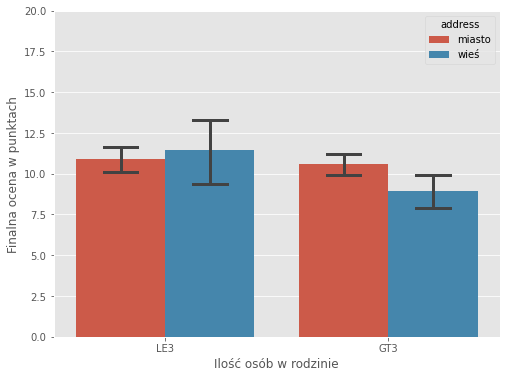

In [41]:
fig, ax = plt.subplots(figsize = (8, 6))

sns.barplot(x='famsize', y = 'G3', data = d, hue = 'address', capsize = .15, errwidth = 3,
           order = ['LE3',"GT3"], hue_order = ['miasto','wieś'])

ax.set_xlabel("Ilość osób w rodzinie")
ax.set_ylabel("Finalna ocena w punktach")


ax.set_ylim(0,20)

(0.0, 20.0)

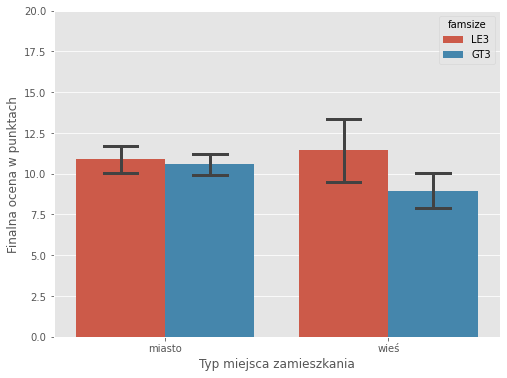

In [42]:
fig, ax = plt.subplots(figsize = (8, 6))

sns.barplot(x='address', y = 'G3', data = d, hue = 'famsize', capsize = .15, errwidth = 3,
           order = ['miasto','wieś'], hue_order = ['LE3','GT3'])

ax.set_xlabel("Typ miejsca zamieszkania")
ax.set_ylabel("Finalna ocena w punktach")




ax.set_ylim(0,20)

##### 4.5 Czy nieobecność w szkole jest powiązana z wiekiem?

H0: Nieobecność w szkole nie jest powiązana z wiekiem\
H1: Nieobecność w szkole jest powiązana z wiekiem

In [43]:
d.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,miasto,GT3,A,wyższe,wyższe,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,miasto,GT3,T,4 klasy,4 klasy,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,miasto,LE3,T,4 klasy,4 klasy,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,miasto,GT3,T,wyższe,9 klasy,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,miasto,GT3,T,średnie,średnie,other,other,...,4,3,2,1,2,5,4,6,10,10


In [44]:
d['absences'].min()

0

In [45]:
pg.corr(x=d['absences'], y=d['age'])

,n,r,CI95%,p-val,BF10,power
pearson,395,0.17523,"[0.08, 0.27]",0.000468,28.025,0.939387


(0.0, 75.0)

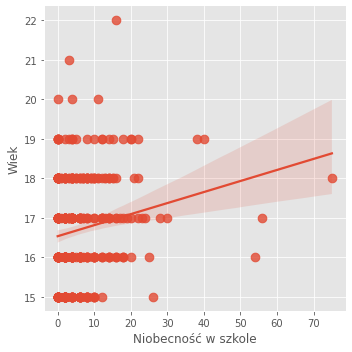

In [46]:
g = sns.lmplot(x = "absences", y = "age", data = d, scatter_kws = {"s":75, "alpha":0.8})

g.set(xlabel = "Niobecność w szkole", ylabel = "Wiek")

ax.set_ylim(0,75)

##### Wnioski

W celu sprawdzenia czy niobecność w szkole jest powiązana z wiekiem uczniów wykonano analizę korelacji r Pearsona. Między dwoma zmiennymi istnieje brak zależności, w związku z czym nie można wykonać analizy.

##### 4.6 Czy można przewidywać finalną ocenę na podstawie płci, liczby nieobecności w szkole oraz wieku?

In [47]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


def get_estimates(model, long=True):
    est = model.conf_int().rename(columns={0:"LL",1:"UL"})
    est.insert(0,"coef", model.params)
    est = est.reset_index().rename(columns={"index":"variable"})
    
    return est


def plot_estimates(estimates=None, model=None, figsize=(12,8), boundaries=None, vline=True):

    def get_estimates(model, long=True):
        est = model.conf_int().rename(columns={0:"LL",1:"UL"})
        est.insert(0,"coef", model.params)
        est = est.reset_index().rename(columns={"index":"variable"})

        return est
    
    
    if estimates is None:
        estimates = get_estimates(model)
    
    fig, ax = plt.subplots(figsize=figsize)

    plt.errorbar(estimates['coef'], estimates.index, xerr=(estimates.UL - estimates.LL)/2, fmt='o', color='black',
                 ecolor=estimates.coef.apply(lambda c: '#E41A1C' if c < 0 else '#029E73'), elinewidth=3, capsize=0)

    plt.yticks(ticks=estimates.index,labels=estimates['variable'])

    if boundaries is not None:
        plt.xlim(boundaries[0],boundaries[1])
        
    if vline == True:
        plt.axvline(0,color='black',linewidth=2,alpha=.8,linestyle="--")
    

    plt.xlabel("Estimate")
    plt.ylabel("")
    plt.show()
    
    
def scale(data, mean=True, std=True):
    if mean == True & std == True:
        data = (data - data.mean()) / data.std()
    elif mean == True & std == False:
        data = data - data.mean()
    elif mean == False & std == True:
        data = data / data.std()
    return data

In [73]:
d.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,sex_centered
0,GP,F,18,miasto,GT3,A,wyższe,wyższe,at_home,teacher,...,3,4,1,1,3,6,5,6,6,-1
1,GP,F,17,miasto,GT3,T,4 klasy,4 klasy,at_home,other,...,3,3,1,1,3,4,5,5,6,-1
2,GP,F,15,miasto,LE3,T,4 klasy,4 klasy,at_home,other,...,3,2,2,3,3,10,7,8,10,-1
3,GP,F,15,miasto,GT3,T,wyższe,9 klasy,health,services,...,2,2,1,1,5,2,15,14,15,-1
4,GP,F,16,miasto,GT3,T,średnie,średnie,other,other,...,3,2,1,2,5,4,6,10,10,-1


In [74]:
model = smf.ols("G3 ~ sex + absences + age", data = d).fit()

results = model.summary()

In [75]:
results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     5.540
Date:                Fri, 21 Jan 2022   Prob (F-statistic):           0.000986
Time:                        15:07:55   Log-Likelihood:                -1153.0
No. Observations:                 395   AIC:                             2314.
Df Residuals:                     391   BIC:                             2330.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.9905      3.013      6.635      0.000      14.067      25.914
sex[T.M]       0.9469      0.455      2.081      0.038       0.052       1.841
absences       0.0407      0.029      1.411      0.159      -0.016       0.097
age           -0.6143      0.181     -3.400      0.001      -0.969      -0.259
==============================================================================
Omnibus:                       26.233   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.571
Skew:                          -0.654   Prob(JB):                     3.79e-07
Kurtosis:                       3.291   Cond. No.                         239.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

F(1, 391) = 5.54 ; p < 0.001

Model równania:

finalna ocena = 19.9905 + 0.95 * płeć[Mężczyzna] + 0.04 * liczba nieobecności w szkole - 0.61 * wiek.

Robimy korelacją cząstkową:

In [76]:
d[['G3','sex','absences', 'age']].pcorr()

,G3,absences,age
G3,1.000000,0.064390,-0.170314
absences,0.064390,1.000000,0.183278
age,-0.170314,0.183278,1.000000


##### Wnioski

W celu sprawdzenia czy można przewidywać finalną ocenę uczniów na podstawie płci, liczby nieobecności w szkole oraz wieku wykonano analizę regresji liniowej. Proponowany model pozwala na przewidywanie zarobków i jest istotny statystycznie,F(1, 391) = 5.54 ; p < 0.001. Model ten wyjaśnia 3.3% wariancji finalnej oceny.

Równanie regresji można zapisać za pomocą wzoru: $\text{G3} = 19.9905 + 0.95 * \text{płeć}_{\text{Mężczyzna}} + 0.04 * \text{liczba nieobecności} - 0.61 * \text{wiek}$

Wiek (r = -0.2 ; p = 0.001 ) jest słabo, ujemnie powiązany z finalną oceną. Lizba nieobecności w szkole (p = 0.16) nie jest istotnym predyktorem finalnej oceny, natomiast płeć (p = 0.03) jest zmienną jakościową i korelacji cząstkowej liczyć się nie powinno. 

Podsumowując, im więcej lat ma uczeń, tym mniejsza jest go finalna ocena.

W związku z tym, że płeć jest istotnym predyktorem finalnej oceny, musimy policzyć to za pomocą 'dummy variables'

In [77]:
d['sex_dv'] = d['sex'].replace({"F":-1, "M":1})

In [78]:
model = smf.ols("G3 ~ sex_dv + absences + age", data = d).fit()

results = model.summary()

In [79]:
results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     5.540
Date:                Fri, 21 Jan 2022   Prob (F-statistic):           0.000986
Time:                        15:11:49   Log-Likelihood:                -1153.0
No. Observations:                 395   AIC:                             2314.
Df Residuals:                     391   BIC:                             2330.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.4639      3.000      6.821      0.000      14.565      26.363
sex_dv         0.4735      0.227      2.081      0.038       0.026       0.921
absences       0.0407      0.029      1.411      0.159      -0.016       0.097
age           -0.6143      0.181     -3.400      0.001      -0.969      -0.259
==============================================================================
Omnibus:                       26.233   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.571
Skew:                          -0.654   Prob(JB):                     3.79e-07
Kurtosis:                       3.291   Cond. No.                         238.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
get_estimates(model)

,variable,coef,LL,UL
0,Intercept,20.463923,14.565099,26.362748
1,sex_dv,0.473450,0.026176,0.920724
2,absences,0.040728,-0.016006,0.097463
3,age,-0.614276,-0.969449,-0.259102


Podsumowując, płeć (r = 0.47 ; p = 0.04) jest średnio i dodatnio korelowana z finalną oceną. W związku z tym, że nasza zmienna jakościowa była kodowana jako 'dummy variable', nowe równanie wygląda tak:\

G3=19.9905 + 0.47 ∗ płeć + 0.04 ∗ liczba nieobecności - 0.61 ∗ wiek.

Ponieważ płeć przyjmuje wartość -1 dla kobiet i 1 dla mężczyzn, przewidywane wyniki są następujące:

G3=19.9905 - 0.47  + 0.04 ∗ liczba nieobecności - 0.61 ∗ wiek. - dla kobiet\
G3=19.9905 + 0.47 + 0.04 ∗ liczba nieobecności - 0.61 ∗ wiek. - dla mężczyzn

##### Wizualizacja danych

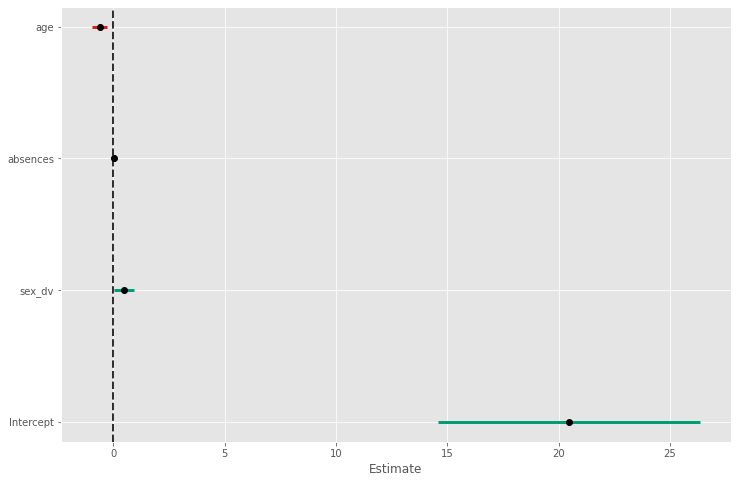

In [81]:
plot_estimates(model=model)

Po standardyzacji danych wykres wygląda w taki sposób

In [85]:
model = smf.ols("scale(G3) ~ scale(age) + scale(absences) + sex_dv", data = d).fit()

results = model.summary()

In [86]:
get_estimates(model)

,variable,coef,LL,UL
0,Intercept,0.005494,-0.091900,0.102889
1,scale(age),-0.171091,-0.270015,-0.072166
2,scale(absences),0.071146,-0.027960,0.170253
3,sex_dv,0.103341,0.005713,0.200968


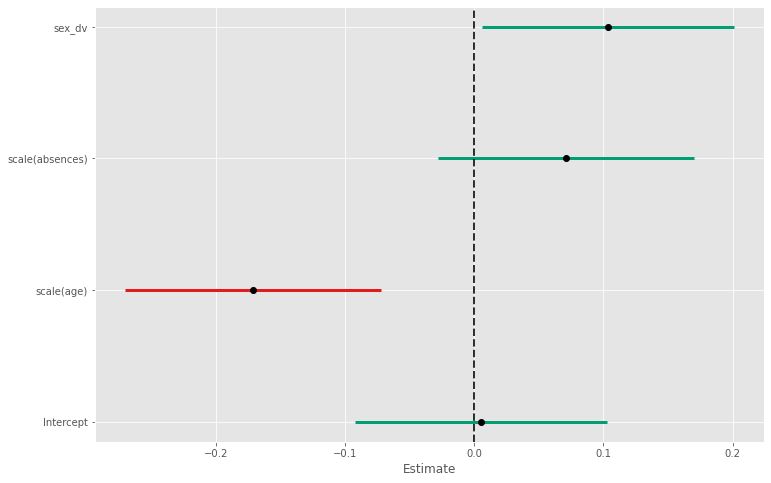

In [87]:
plot_estimates(model=model)